# Loading required libraries

In [186]:
import pandas as pd
import numpy as np
from outliers import smirnov_grubbs as grubbs
from scipy import stats
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from pandas_profiling import ProfileReport
import warnings
warnings.filterwarnings('ignore')

# Loading Data

In [148]:
df = pd.read_csv("Dataset\Telecom_customer churn.csv")

# Set Index as CustomerID

In [149]:
df1 = df.set_index('Customer_ID')

## Replace NaN in numbcars with 0

In [150]:
df1['numbcars'] = df1['numbcars'].fillna(0)

#Checking if its done


if df1['numbcars'].isna().sum() ==0:
    print("There are no missing values")
else:
    print("Some values are missing")

There are no missing values


# Removing missing values

### Removing rows with more than 3% Missing values

In [151]:
missing_per = round((df1.isna().sum()/len(df1))*100,2)

#Sort the values from largest to smallest and display top 50 rows
df_m = pd.DataFrame(missing_per).sort_values(by=0, ascending=False).head(50)

missing_value_cols = df_m[df_m[0]<3].index.tolist()

In [152]:
df2 = df1.dropna(subset= missing_value_cols)
df2

rev_Mean     mou_Mean  totmrc_Mean  da_Mean  ovrmou_Mean  \
Customer_ID                                                               
1000001       23.997500   219.250000        22.50   0.2475     0.000000   
1000003       16.990000    10.250000        16.99   0.0000     0.000000   
1000004       38.000000     7.500000        38.00   0.0000     0.000000   
1000005       55.230000   570.500000        71.98   0.0000     0.000000   
1000006       82.275000  1312.250000        75.00   1.2375     0.000000   
...                 ...          ...          ...      ...          ...   
1099982       34.990000     6.333333        44.99   0.0000     0.000000   
1099985       85.150000   815.000000        87.99   0.0000     1.000000   
1099986       71.993333   724.000000        70.00   0.0000     4.333333   
1099987      117.490000   384.000000        29.99   0.0000   250.000000   
1099994       95.170000  1745.000000        84.99   0.9900    45.000000   

             ovrrev_Mean  vceovr_Mean  datovr_Mean  roam_Mean  change_mou  \
Customer_ID                                                                 
1000001         0.000000     0.000000         0.00       0.00 -157.250000   
1000003         0.000000     0.000000         0.00       0.00   -4.250000   
1000004         0.000000     0.000000         0.00       0.00   -1.500000   
1000005         0.000000     0.000000         0.00       0.00   38.500000   
1000006         0.000000     0.000000         0.00       0.00  156.750000   
...                  ...          ...          ...        ...         ...   
1099982         0.000000     0.000000         0.00       0.00   -6.333333   
1099985         0.390000     0.000000         0.39       0.39    0.000000   
1099986         1.083333     1.083333         0.00       0.91  -40.000000   
1099987        87.500000    87.500000         0.00       0.00    0.000000   
1099994        11.250000    11.250000         0.00       4.69  122.000000   

             ...  dwllsize  forgntvl  ethnic  kid0_2  kid3_5  kid6_10  \
Customer_ID  ...                                                        
1000001      ...         A       0.0       N       U       U        U   
1000003      ...         A       0.0       N       U       Y        U   
1000004      ...         D       0.0       U       Y       U        U   
1000005      ...         O       0.0       I       U       U        U   
1000006      ...       NaN       0.0       U       U       U        U   
...          ...       ...       ...     ...     ...     ...      ...   
1099982      ...         A       0.0       N       U       U        Y   
1099985      ...       NaN       0.0       H       U       U        U   
1099986      ...       NaN       0.0       S       U       U        U   
1099987      ...         A       0.0       S       U       U        U   
1099994      ...         A       0.0       N       U       U        U   

             kid11_15  kid16_17  creditcd  eqpdays  
Customer_ID                                         
1000001             U         U         Y    361.0  
1000003             U         U         Y   1504.0  
1000004             U         U         Y   1812.0  
1000005             U         U         Y    434.0  
1000006             U         U         Y    458.0  
...               ...       ...       ...      ...  
1099982             U         U         Y    118.0  
1099985             U         U         Y    230.0  
1099986             U         U         Y    882.0  
1099987             U         U         Y    489.0  
1099994             U         Y         Y    464.0  

[93893 rows x 99 columns]

### Removing columns which have more than 3% missing values

In [153]:
missing_per1 = round((df2.isna().sum()/len(df2))*100,2)

#Sort the values from largest to smallest and display top 50 rows
df_mc = pd.DataFrame(missing_per1).sort_values(by=0, ascending=False).head(50)

missing_cols = df_mc[df_mc[0]>3].index.tolist()
missing_cols

['dwllsize',
 'HHstatin',
 'ownrent',
 'dwlltype',
 'lor',
 'income',
 'adults',
 'infobase',
 'hnd_webcap',
 'prizm_social_one']

In [154]:
df3 = df2.drop(missing_cols,axis=1)
df3

rev_Mean     mou_Mean  totmrc_Mean  da_Mean  ovrmou_Mean  \
Customer_ID                                                               
1000001       23.997500   219.250000        22.50   0.2475     0.000000   
1000003       16.990000    10.250000        16.99   0.0000     0.000000   
1000004       38.000000     7.500000        38.00   0.0000     0.000000   
1000005       55.230000   570.500000        71.98   0.0000     0.000000   
1000006       82.275000  1312.250000        75.00   1.2375     0.000000   
...                 ...          ...          ...      ...          ...   
1099982       34.990000     6.333333        44.99   0.0000     0.000000   
1099985       85.150000   815.000000        87.99   0.0000     1.000000   
1099986       71.993333   724.000000        70.00   0.0000     4.333333   
1099987      117.490000   384.000000        29.99   0.0000   250.000000   
1099994       95.170000  1745.000000        84.99   0.9900    45.000000   

             ovrrev_Mean  vceovr_Mean  datovr_Mean  roam_Mean  change_mou  \
Customer_ID                                                                 
1000001         0.000000     0.000000         0.00       0.00 -157.250000   
1000003         0.000000     0.000000         0.00       0.00   -4.250000   
1000004         0.000000     0.000000         0.00       0.00   -1.500000   
1000005         0.000000     0.000000         0.00       0.00   38.500000   
1000006         0.000000     0.000000         0.00       0.00  156.750000   
...                  ...          ...          ...        ...         ...   
1099982         0.000000     0.000000         0.00       0.00   -6.333333   
1099985         0.390000     0.000000         0.39       0.39    0.000000   
1099986         1.083333     1.083333         0.00       0.91  -40.000000   
1099987        87.500000    87.500000         0.00       0.00    0.000000   
1099994        11.250000    11.250000         0.00       4.69  122.000000   

             ...  numbcars  forgntvl  ethnic  kid0_2  kid3_5  kid6_10  \
Customer_ID  ...                                                        
1000001      ...       3.0       0.0       N       U       U        U   
1000003      ...       2.0       0.0       N       U       Y        U   
1000004      ...       1.0       0.0       U       Y       U        U   
1000005      ...       1.0       0.0       I       U       U        U   
1000006      ...       1.0       0.0       U       U       U        U   
...          ...       ...       ...     ...     ...     ...      ...   
1099982      ...       0.0       0.0       N       U       U        Y   
1099985      ...       2.0       0.0       H       U       U        U   
1099986      ...       0.0       0.0       S       U       U        U   
1099987      ...       0.0       0.0       S       U       U        U   
1099994      ...       2.0       0.0       N       U       U        U   

             kid11_15  kid16_17  creditcd  eqpdays  
Customer_ID                                         
1000001             U         U         Y    361.0  
1000003             U         U         Y   1504.0  
1000004             U         U         Y   1812.0  
1000005             U         U         Y    434.0  
1000006             U         U         Y    458.0  
...               ...       ...       ...      ...  
1099982             U         U         Y    118.0  
1099985             U         U         Y    230.0  
1099986             U         U         Y    882.0  
1099987             U         U         Y    489.0  
1099994             U         Y         Y    464.0  

[93893 rows x 89 columns]

#### Check if any missing value is still present

In [155]:
#Checking if there is any missing value still left
missing_per2 = round((df3.isna().sum()/len(df3))*100,2)

pd.DataFrame(missing_per2).sort_values(by=0, ascending=False).sum()
#zeros means that there are no missing values

0    0.0
dtype: float64

# Remove outliers from numerical values

#### List down the numerical columns

In [156]:
df4 = df3

numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
num_df = df4.select_dtypes(include=numerics)
num_df.columns

Index(['rev_Mean', 'mou_Mean', 'totmrc_Mean', 'da_Mean', 'ovrmou_Mean',
       'ovrrev_Mean', 'vceovr_Mean', 'datovr_Mean', 'roam_Mean', 'change_mou',
       'change_rev', 'drop_vce_Mean', 'drop_dat_Mean', 'blck_vce_Mean',
       'blck_dat_Mean', 'unan_vce_Mean', 'unan_dat_Mean', 'plcd_vce_Mean',
       'plcd_dat_Mean', 'recv_vce_Mean', 'recv_sms_Mean', 'comp_vce_Mean',
       'comp_dat_Mean', 'custcare_Mean', 'ccrndmou_Mean', 'cc_mou_Mean',
       'inonemin_Mean', 'threeway_Mean', 'mou_cvce_Mean', 'mou_cdat_Mean',
       'mou_rvce_Mean', 'owylis_vce_Mean', 'mouowylisv_Mean',
       'iwylis_vce_Mean', 'mouiwylisv_Mean', 'peak_vce_Mean', 'peak_dat_Mean',
       'mou_peav_Mean', 'mou_pead_Mean', 'opk_vce_Mean', 'opk_dat_Mean',
       'mou_opkv_Mean', 'mou_opkd_Mean', 'drop_blk_Mean', 'attempt_Mean',
       'complete_Mean', 'callfwdv_Mean', 'callwait_Mean', 'churn', 'months',
       'uniqsubs', 'actvsubs', 'totcalls', 'totmou', 'totrev', 'adjrev',
       'adjmou', 'adjqty', 'avgrev', 'avg

#### Ther are still some categorical values which we should be removed from the list 


'churn', 'months', 'phones','eqpdays','models', 'truck', 'rv', 'numbcars','forgntvl'

In [157]:
df4 = df4[['rev_Mean', 'mou_Mean', 'totmrc_Mean', 'da_Mean', 'ovrmou_Mean',
       'ovrrev_Mean', 'vceovr_Mean', 'datovr_Mean', 'roam_Mean', 'change_mou',
       'change_rev', 'drop_vce_Mean', 'drop_dat_Mean', 'blck_vce_Mean',
       'blck_dat_Mean', 'unan_vce_Mean', 'unan_dat_Mean', 'plcd_vce_Mean',
       'plcd_dat_Mean', 'recv_vce_Mean', 'recv_sms_Mean', 'comp_vce_Mean',
       'comp_dat_Mean', 'custcare_Mean', 'ccrndmou_Mean', 'cc_mou_Mean',
       'inonemin_Mean', 'threeway_Mean', 'mou_cvce_Mean', 'mou_cdat_Mean',
       'mou_rvce_Mean', 'owylis_vce_Mean', 'mouowylisv_Mean',
       'iwylis_vce_Mean', 'mouiwylisv_Mean', 'peak_vce_Mean', 'peak_dat_Mean',
       'mou_peav_Mean', 'mou_pead_Mean', 'opk_vce_Mean', 'opk_dat_Mean',
       'mou_opkv_Mean', 'mou_opkd_Mean', 'drop_blk_Mean', 'attempt_Mean',
       'complete_Mean', 'callfwdv_Mean', 'callwait_Mean',
       'uniqsubs', 'actvsubs', 'totcalls', 'totmou', 'totrev', 'adjrev',
       'adjmou', 'adjqty', 'avgrev', 'avgmou', 'avgqty', 'avg3mou', 'avg3qty',
       'avg3rev', 'avg6mou', 'avg6qty', 'avg6rev', 'hnd_price']]

### Calculating z score and removing values with z score more than 3

Z-scores can quantify the unusualness of an observation when your data follow the normal distribution. Z-scores are the number of standard deviations above and below the mean that each value falls. For example, a Z-score of 2 indicates that an observation is two standard deviations above the average while a Z-score of -2 signifies it is two standard deviations below the mean. A Z-score of zero represents a value that equals the mean.

To calculate the Z-score for an observation, take the raw measurement, subtract the mean, and divide by the standard deviation. Mathematically, the formula for that process is the following:

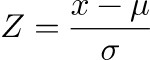

Z	=	standard score

x	=	observed value

μ =mean of the sample

σ =standard deviation of the sample


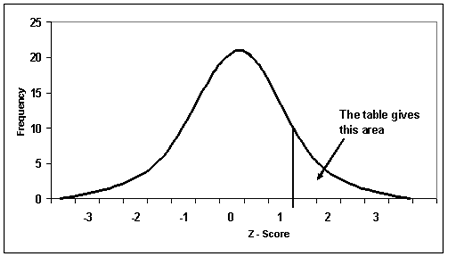

In [160]:
num_df = pd.DataFrame(df4)
z = np.abs(stats.zscore(num_df))
num_df = num_df[(z < 3).all(axis=1)]
num_df

rev_Mean    mou_Mean  totmrc_Mean  da_Mean  ovrmou_Mean  \
Customer_ID                                                              
1000001       23.997500  219.250000        22.50   0.2475     0.000000   
1000003       16.990000   10.250000        16.99   0.0000     0.000000   
1000004       38.000000    7.500000        38.00   0.0000     0.000000   
1000005       55.230000  570.500000        71.98   0.0000     0.000000   
1000007       17.145000    0.000000        16.99   0.0000     0.000000   
...                 ...         ...          ...      ...          ...   
1099977       31.923333   63.333333        16.99   0.0000    42.666667   
1099982       34.990000    6.333333        44.99   0.0000     0.000000   
1099985       85.150000  815.000000        87.99   0.0000     1.000000   
1099986       71.993333  724.000000        70.00   0.0000     4.333333   
1099987      117.490000  384.000000        29.99   0.0000   250.000000   

             ovrrev_Mean  vceovr_Mean  datovr_Mean  roam_Mean  change_mou  \
Customer_ID                                                                 
1000001         0.000000     0.000000         0.00       0.00 -157.250000   
1000003         0.000000     0.000000         0.00       0.00   -4.250000   
1000004         0.000000     0.000000         0.00       0.00   -1.500000   
1000005         0.000000     0.000000         0.00       0.00   38.500000   
1000007         0.000000     0.000000         0.00       0.00    0.000000   
...                  ...          ...          ...        ...         ...   
1099977        14.933333    14.933333         0.00       0.00  -38.333333   
1099982         0.000000     0.000000         0.00       0.00   -6.333333   
1099985         0.390000     0.000000         0.39       0.39    0.000000   
1099986         1.083333     1.083333         0.00       0.91  -40.000000   
1099987        87.500000    87.500000         0.00       0.00    0.000000   

             ...  avgrev  avgmou  avgqty  avg3mou  avg3qty  avg3rev  avg6mou  \
Customer_ID  ...                                                               
1000001      ...   29.66   83.37   32.69      272      116       30    322.0   
1000003      ...   34.54  433.98  140.86       12        7       17     11.0   
1000004      ...   40.45   63.23   30.81        8        3       38     50.0   
1000005      ...   38.69  249.38   79.50      558      191       55    586.0   
1000007      ...   58.95  334.06  120.60        0        0       17      0.0   
...          ...     ...     ...     ...      ...      ...      ...      ...   
1099977      ...   25.50   39.17   18.09       84       39       39     46.0   
1099982      ...   40.02  195.17   43.96      116       23       36    203.0   
1099985      ...   70.53  339.86   73.76      482      106       93    536.0   
1099986      ...   77.68  636.00  233.70      715      291       73    707.0   
1099987      ...   42.98  160.62  126.81      128       99       35    135.0   

             avg6qty  avg6rev  hnd_price  
Customer_ID                               
1000001        136.0     38.0  149.98999  
1000003          6.0     17.0   29.98999  
1000004         25.0     40.0   29.98999  
1000005        196.0     80.0  149.98999  
1000007          0.0     17.0   29.98999  
...              ...      ...        ...  
1099977         22.0     28.0   29.98999  
1099982         39.0     37.0   99.98999  
1099985         93.0     96.0  199.98999  
1099986        262.0     74.0   29.98999  
1099987        106.0     34.0   59.98999  

[76219 rows x 66 columns]

Distrubution plot for the data

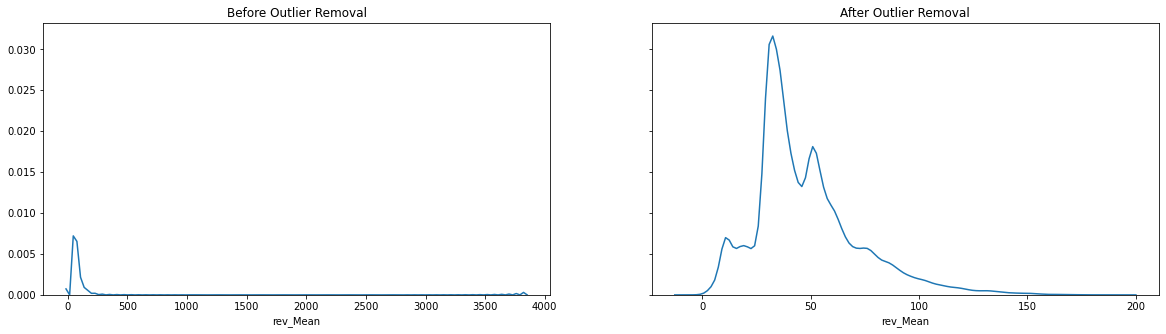

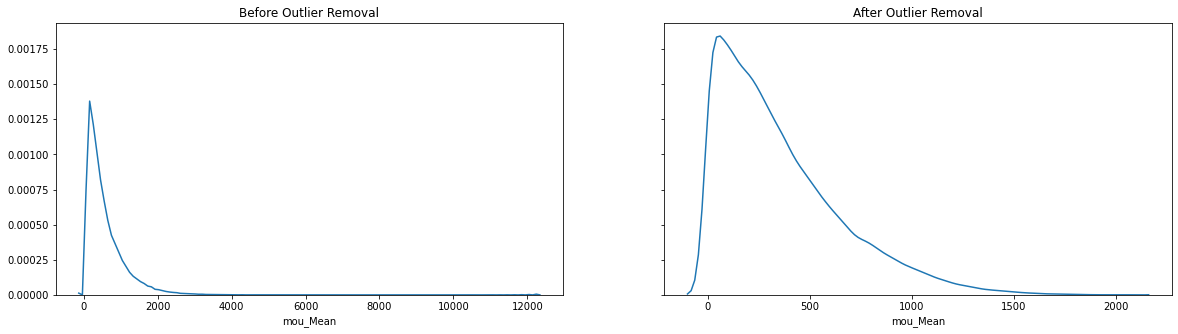

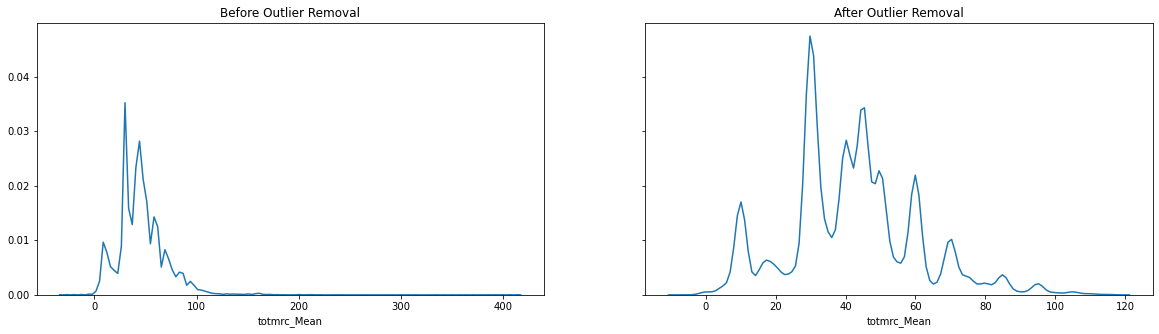

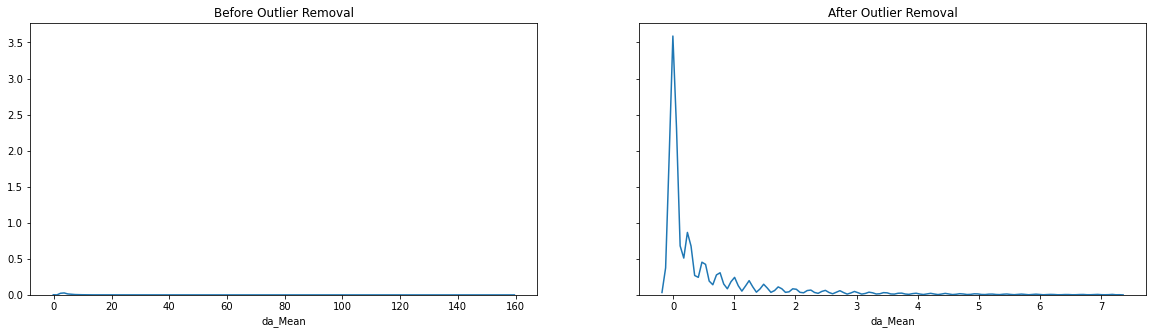

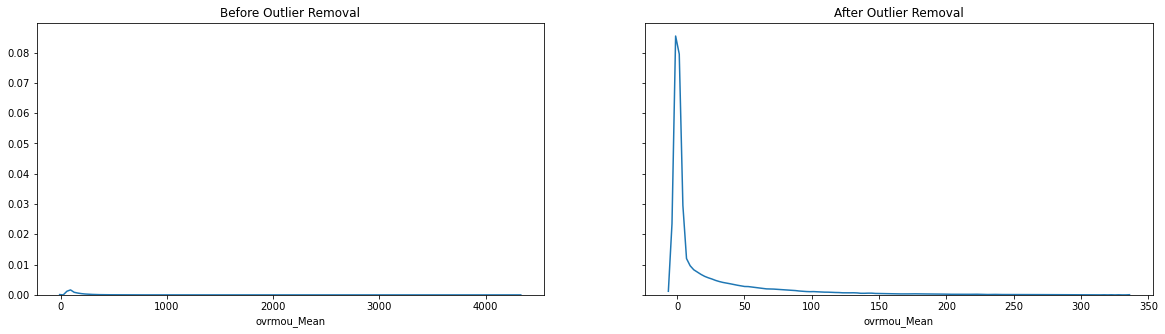

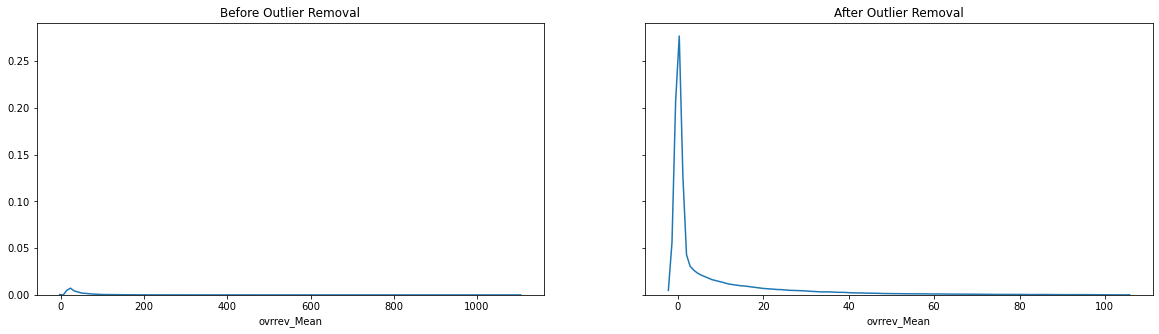

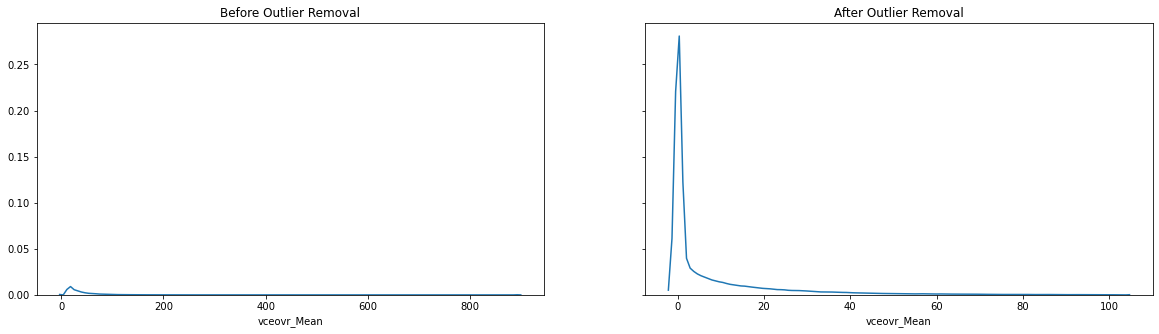

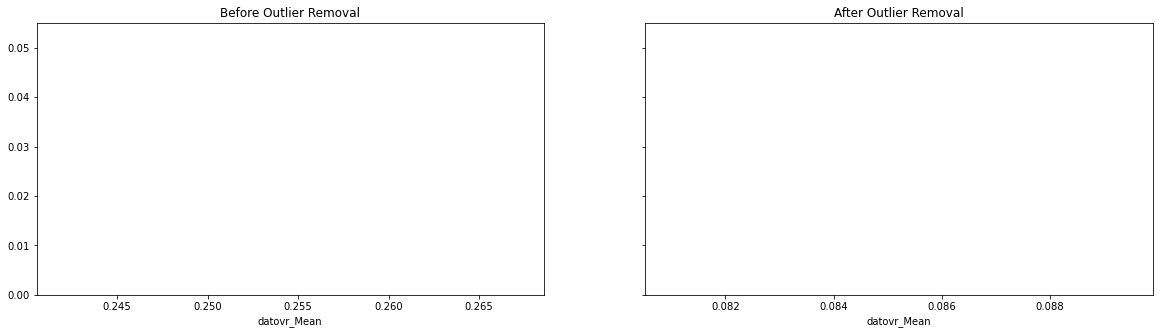

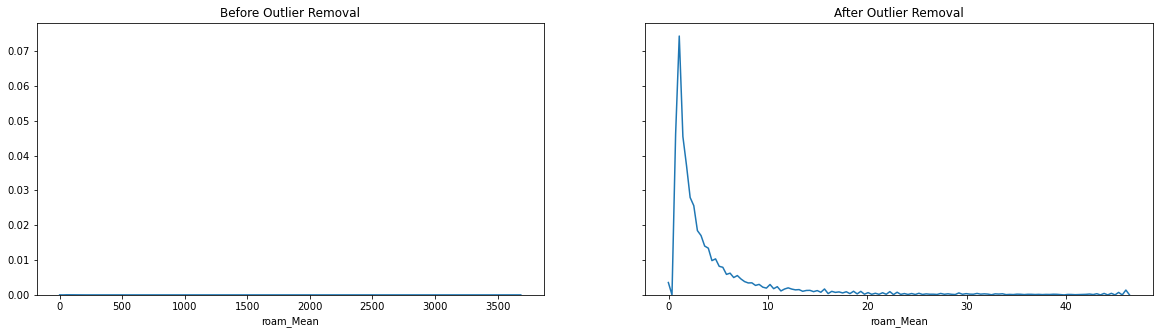

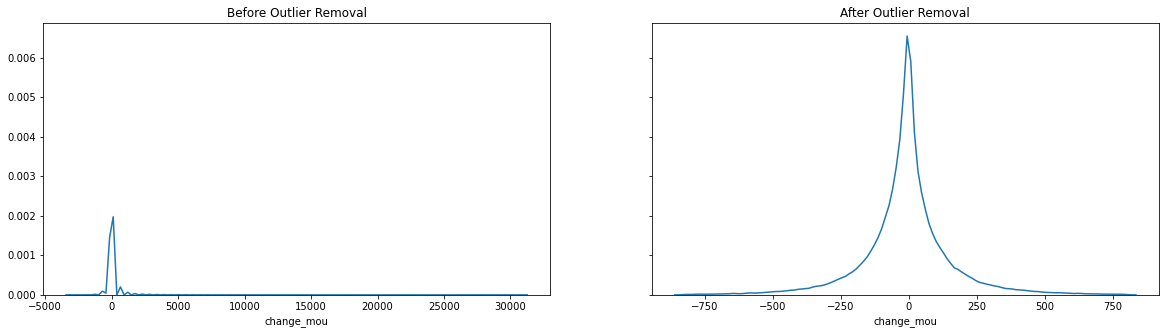

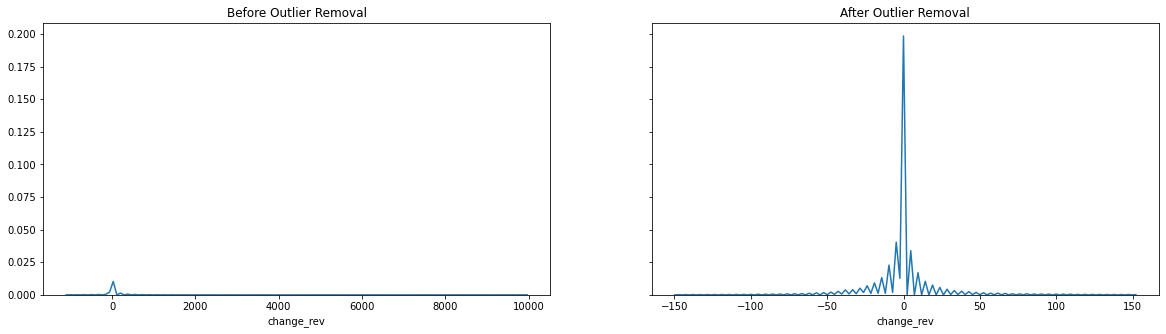

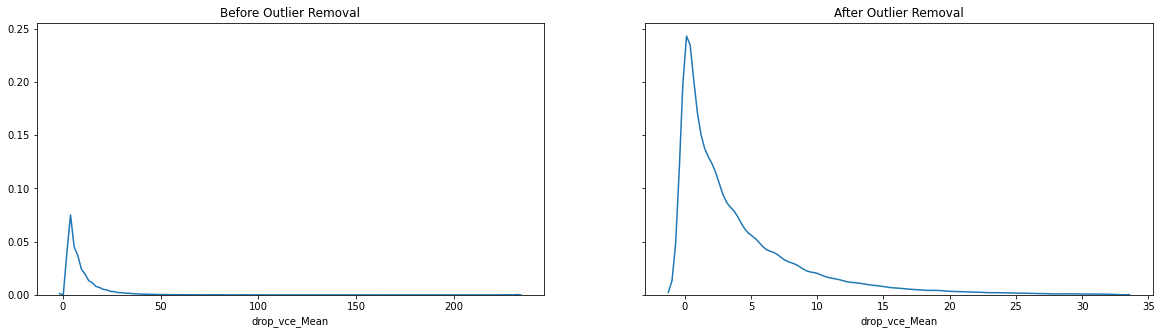

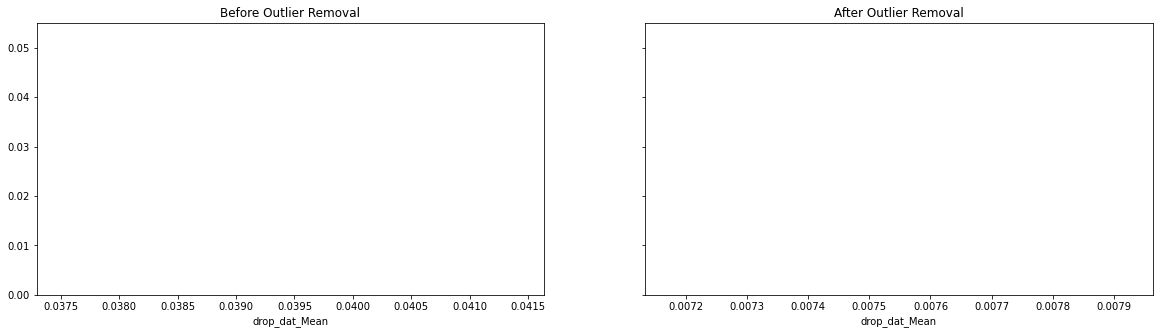

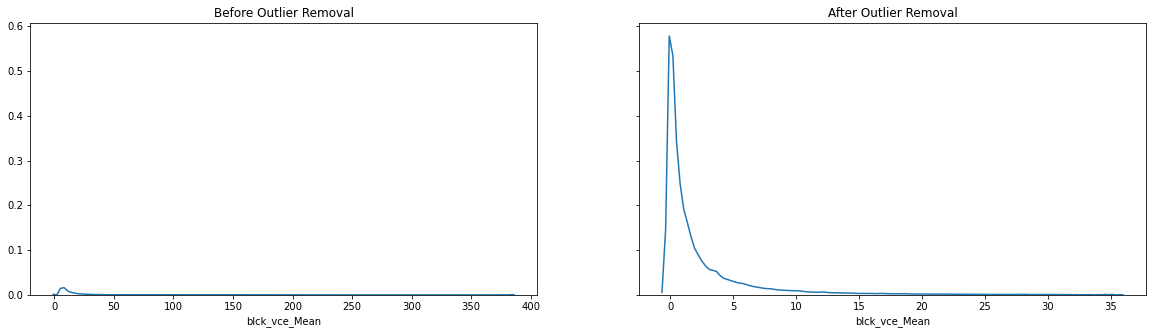

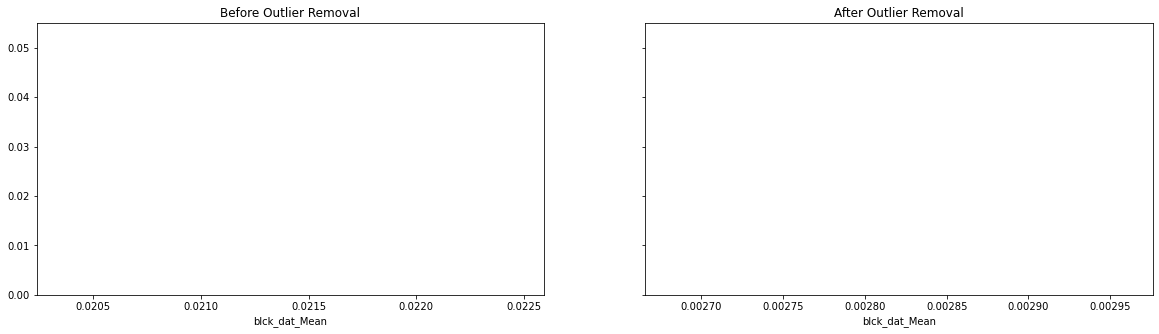

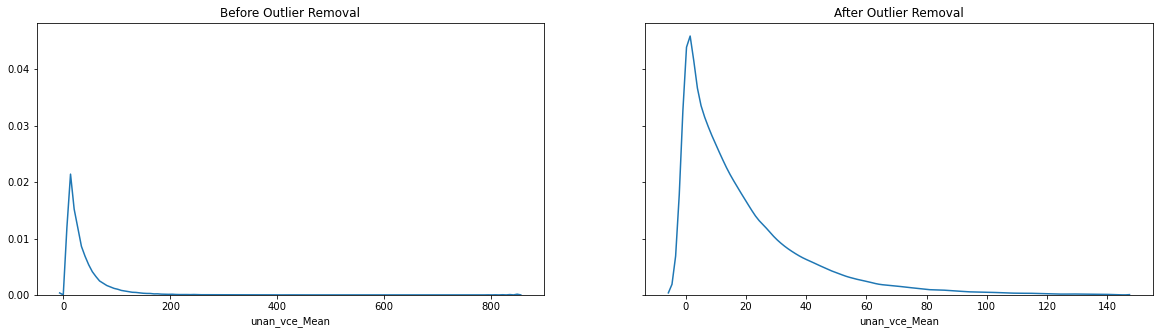

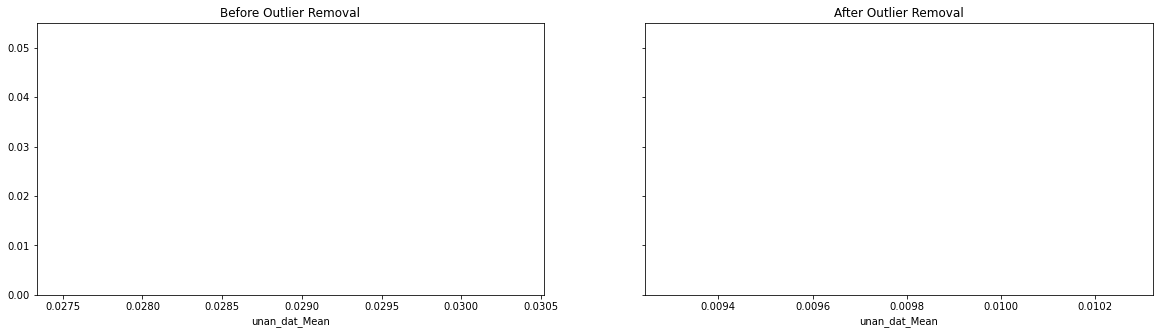

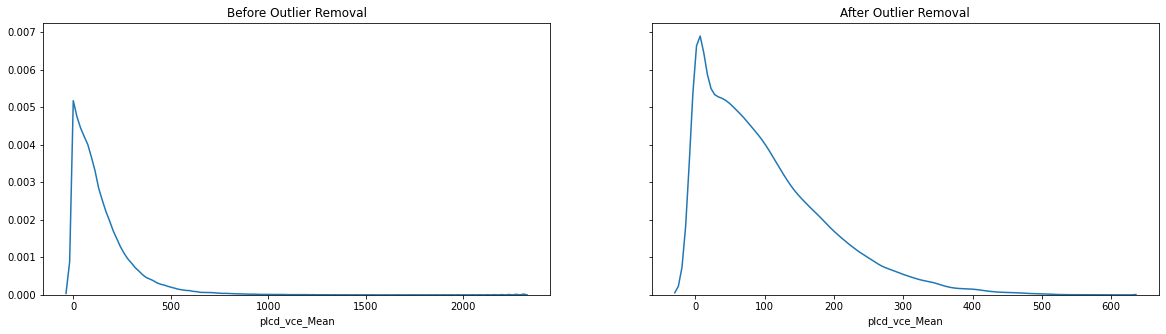

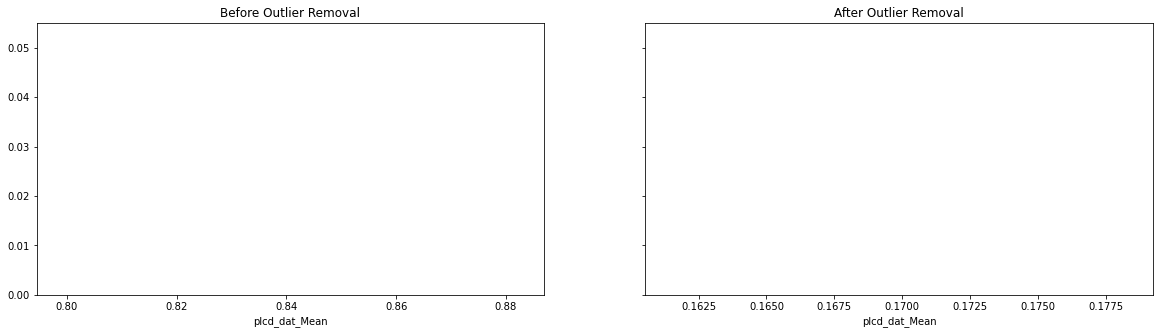

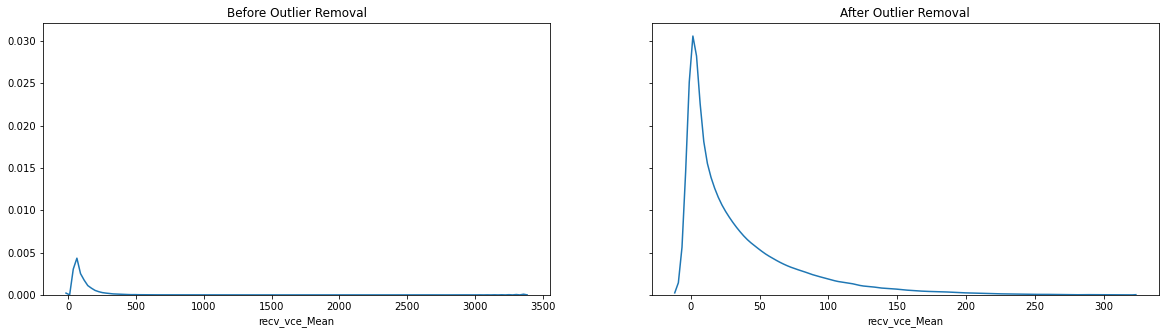

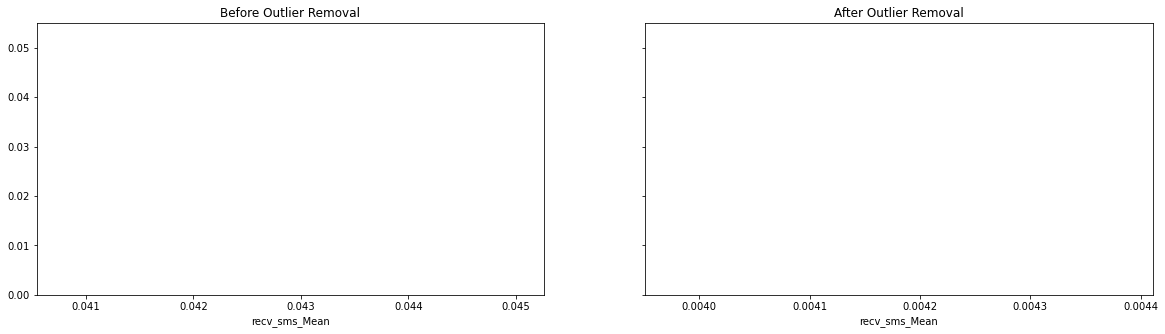

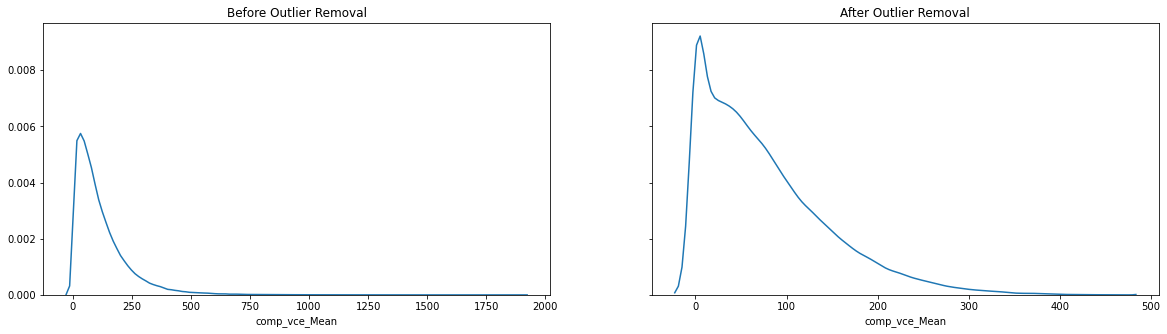

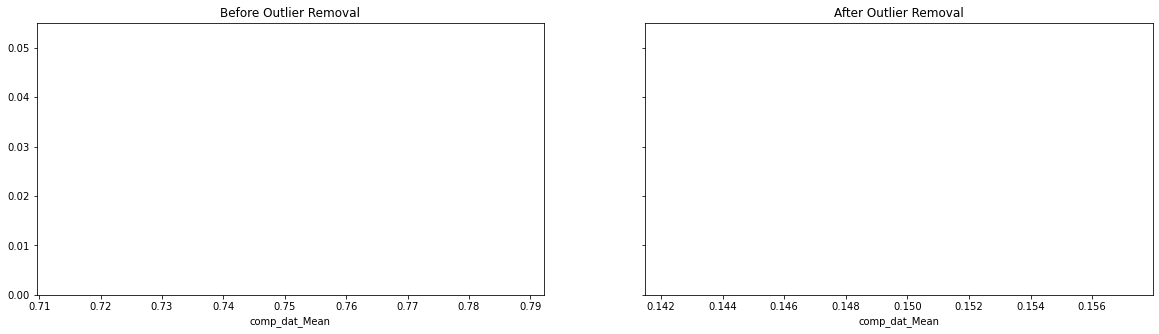

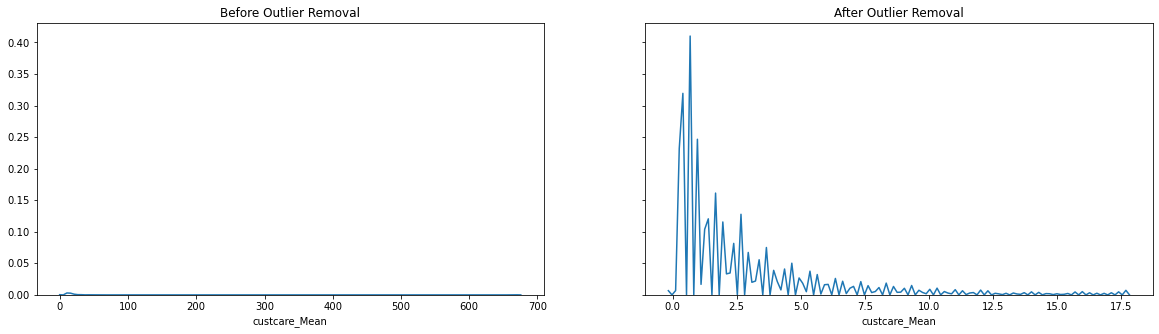

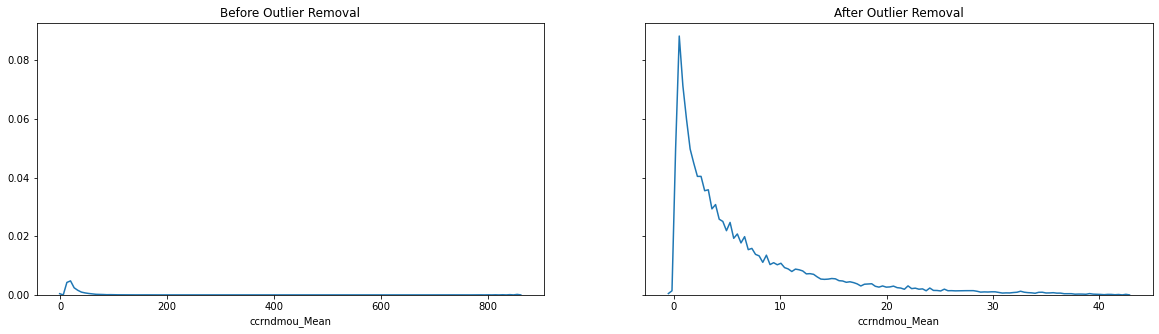

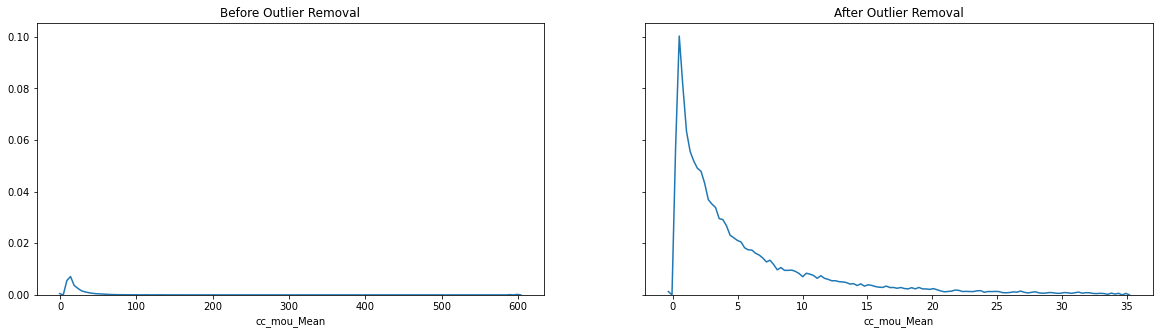

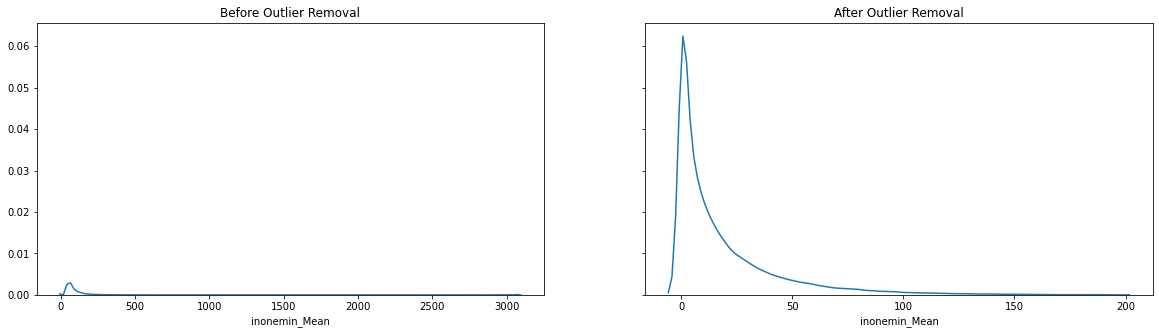

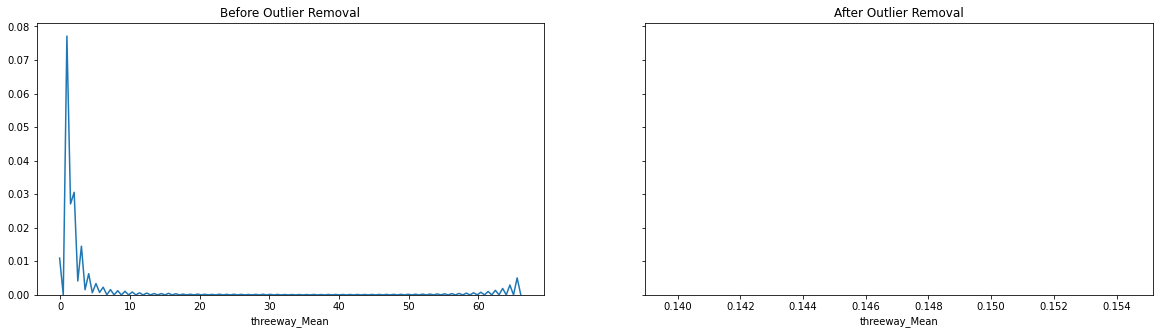

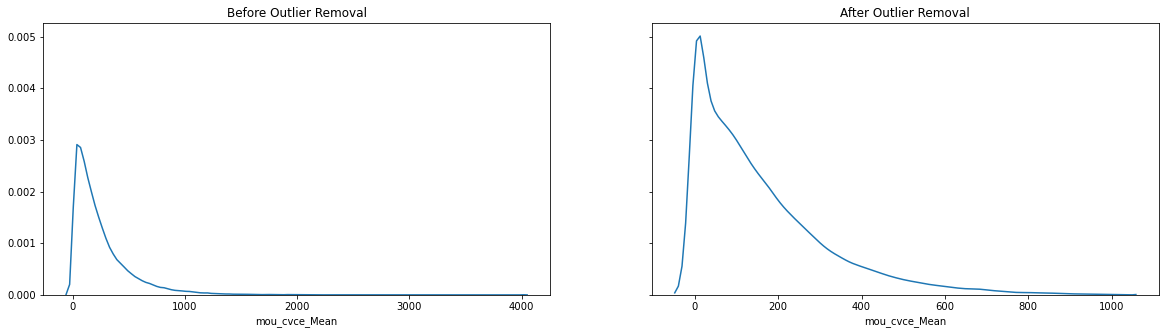

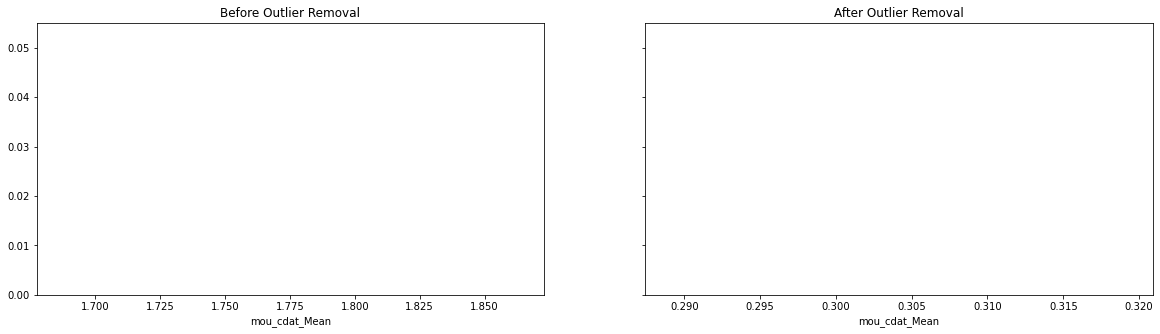

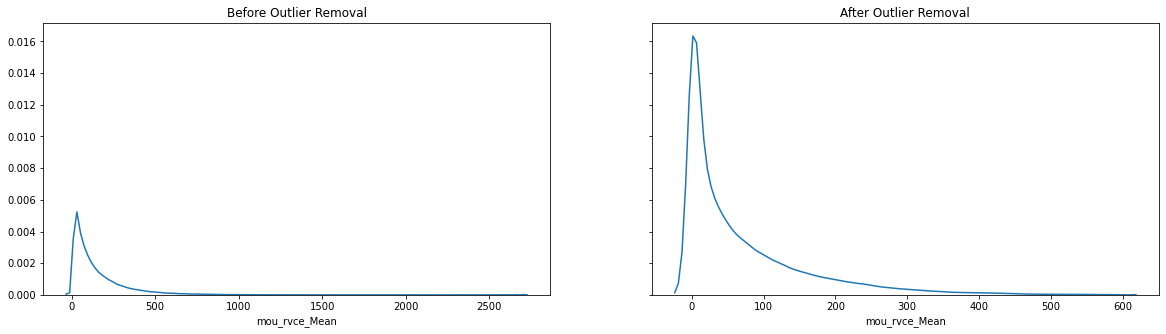

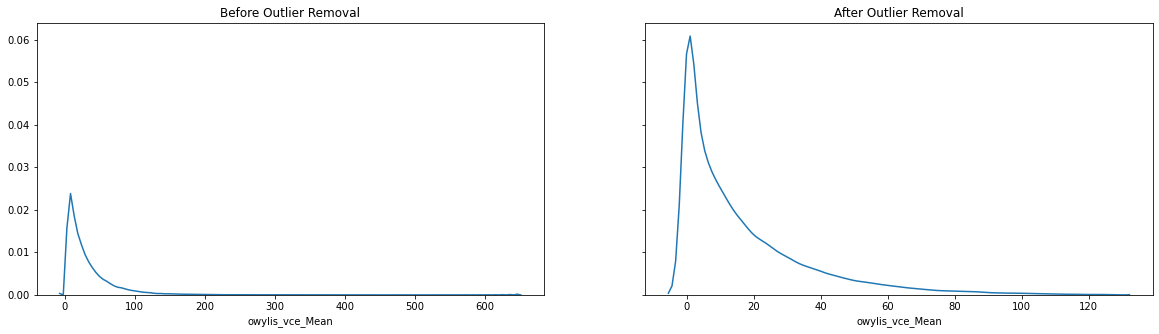

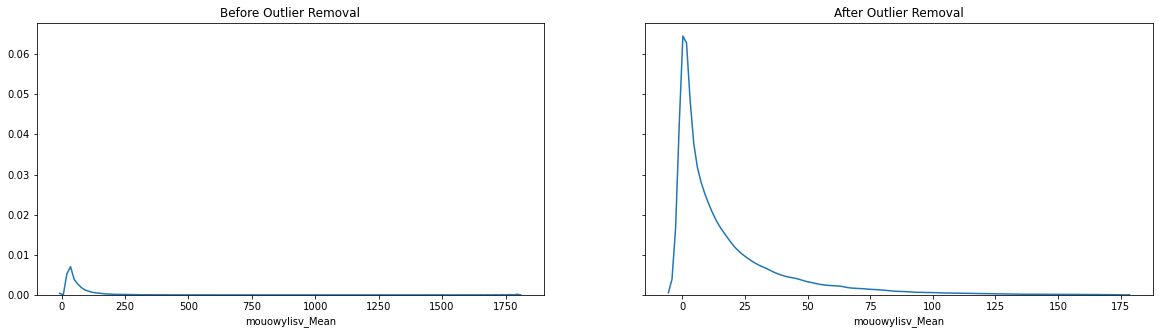

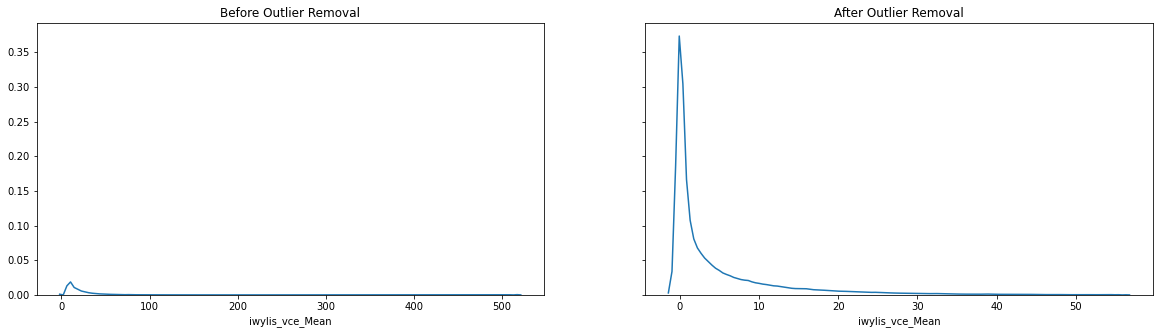

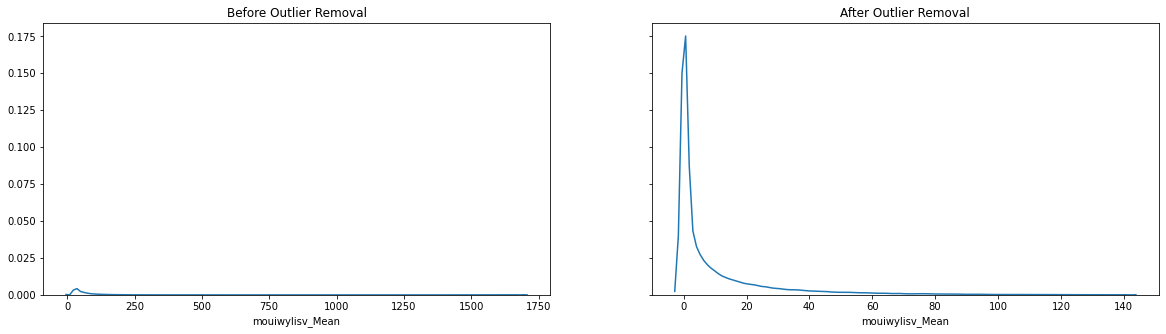

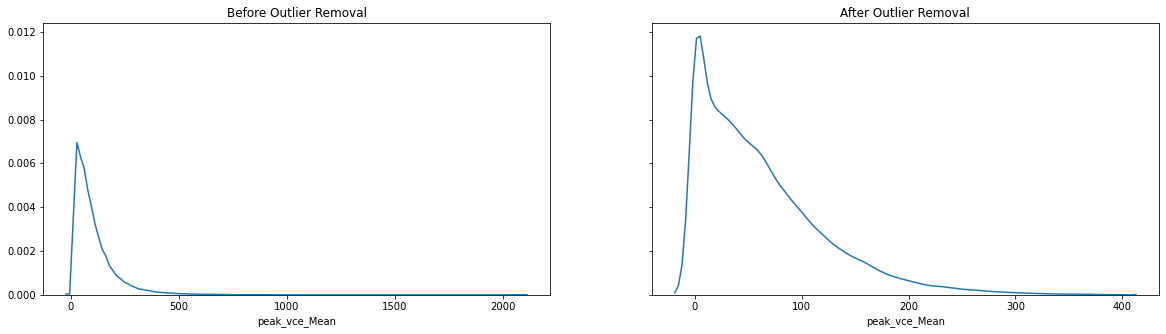

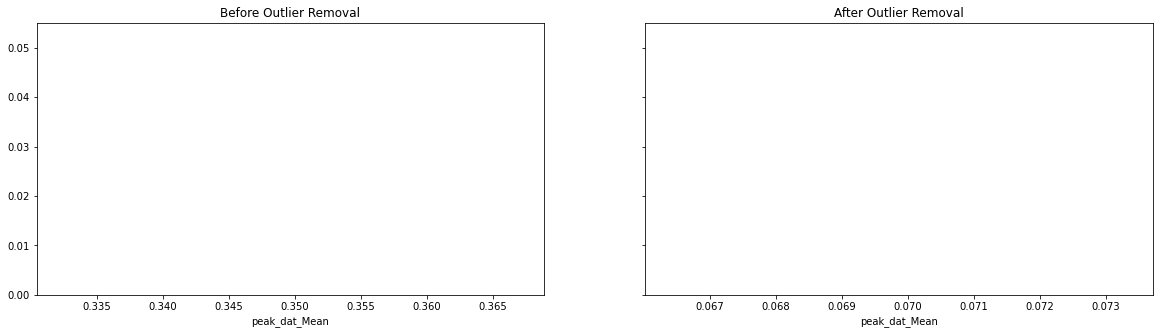

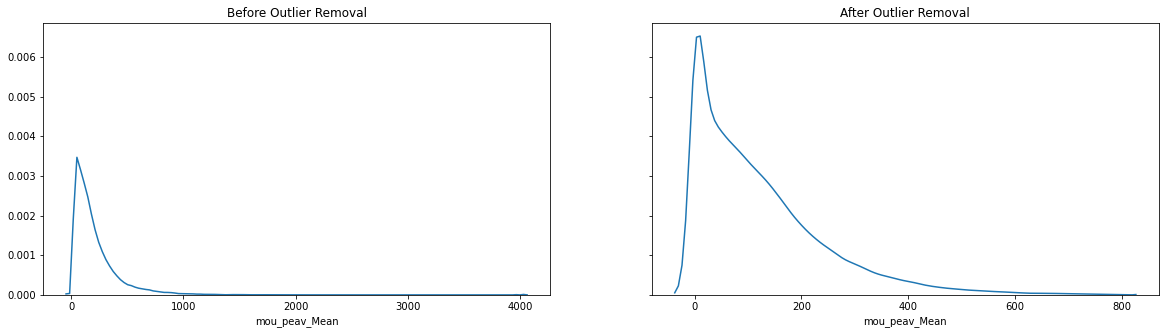

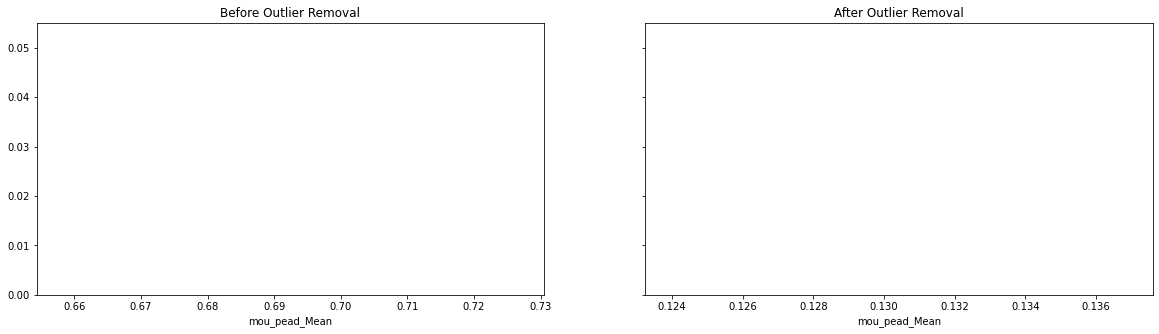

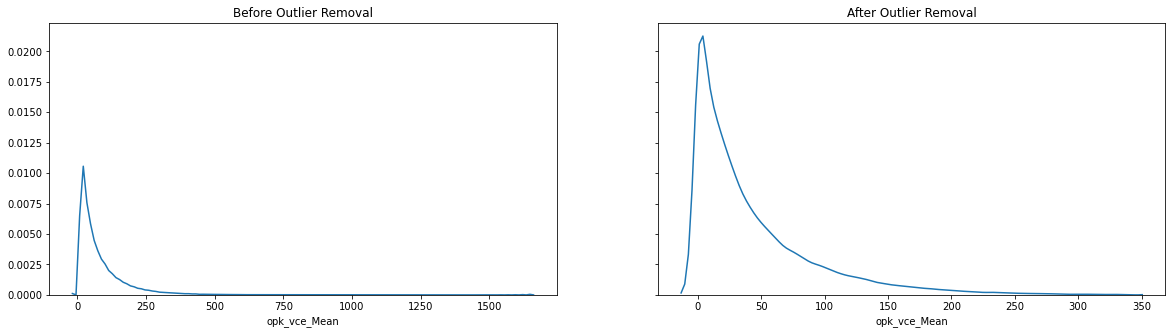

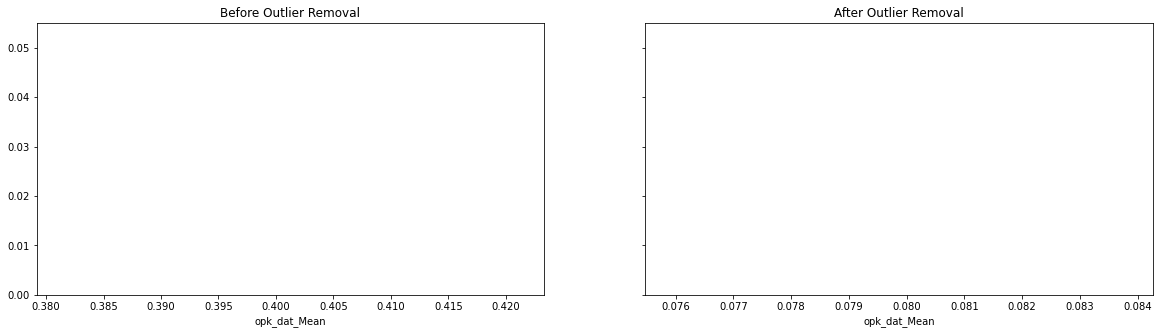

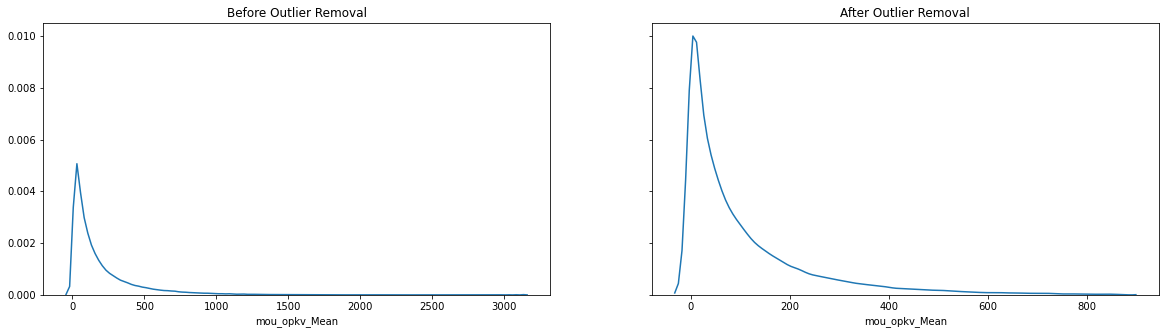

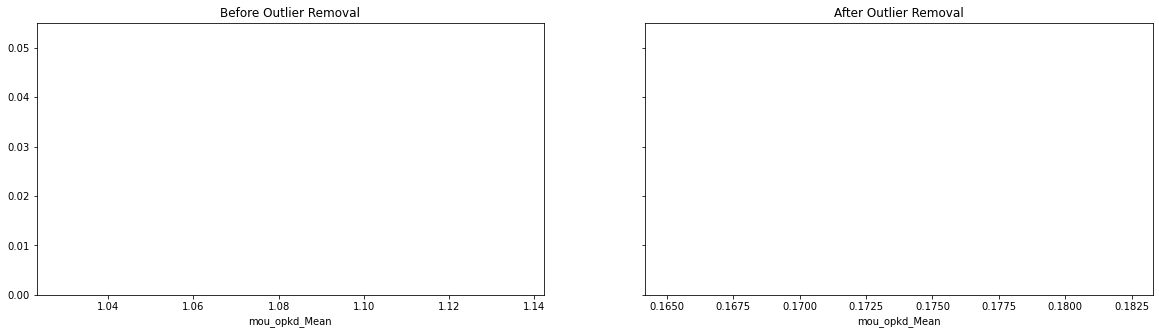

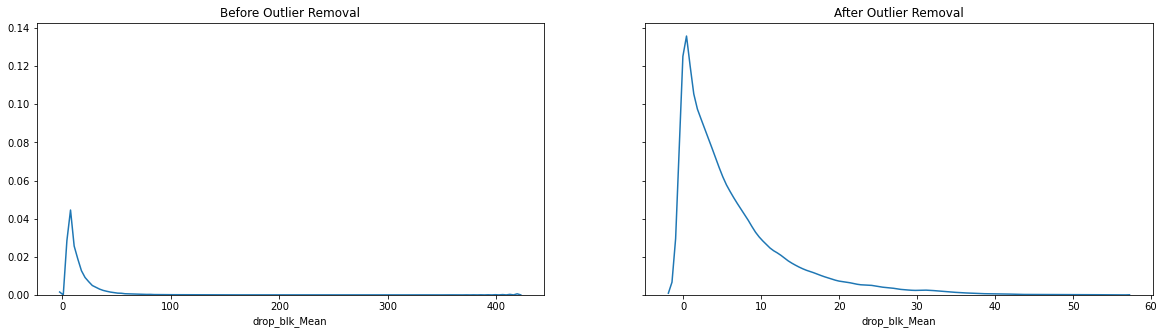

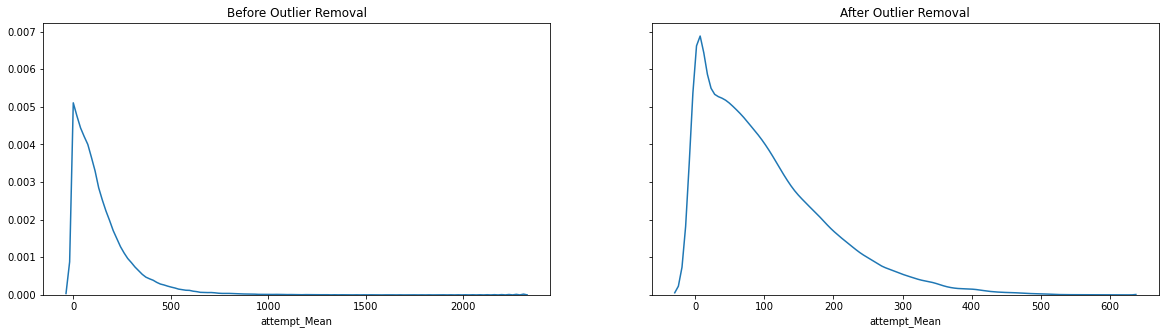

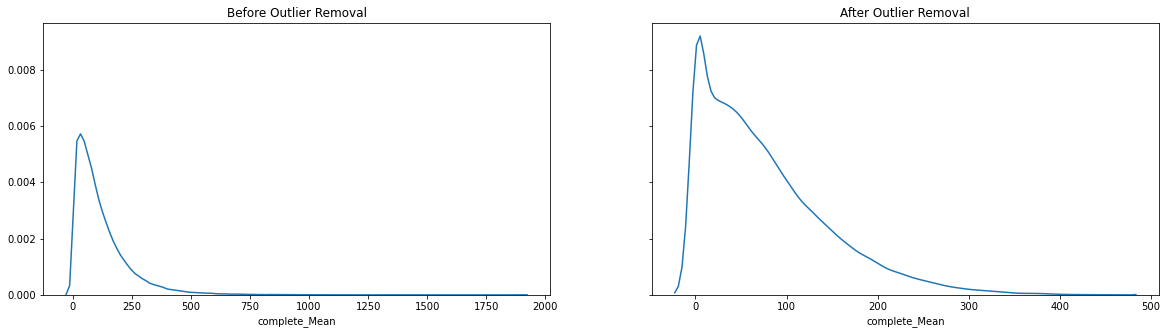

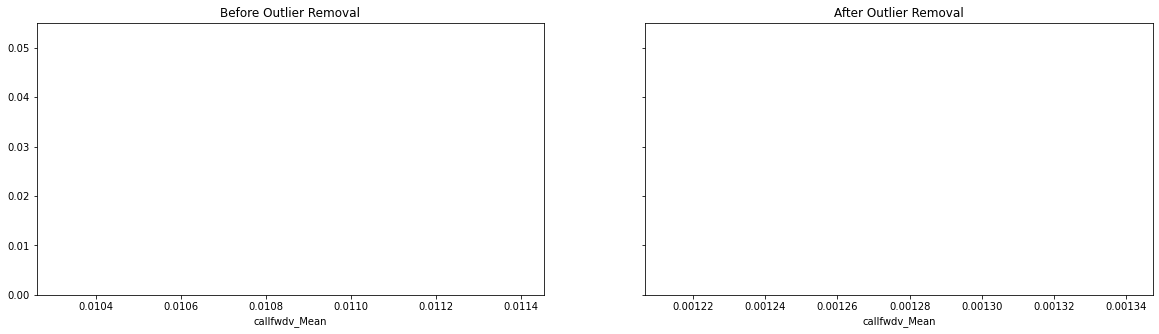

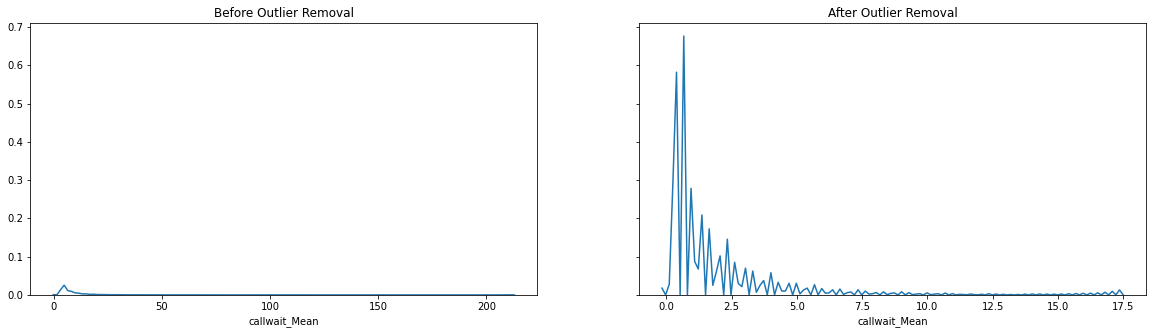

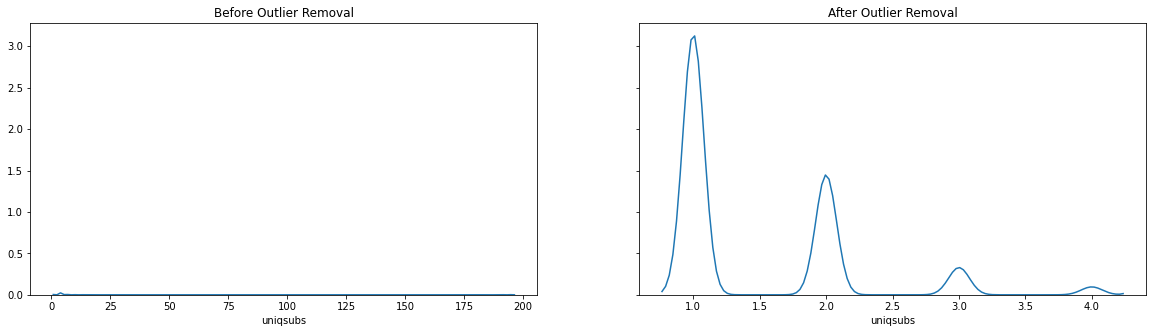

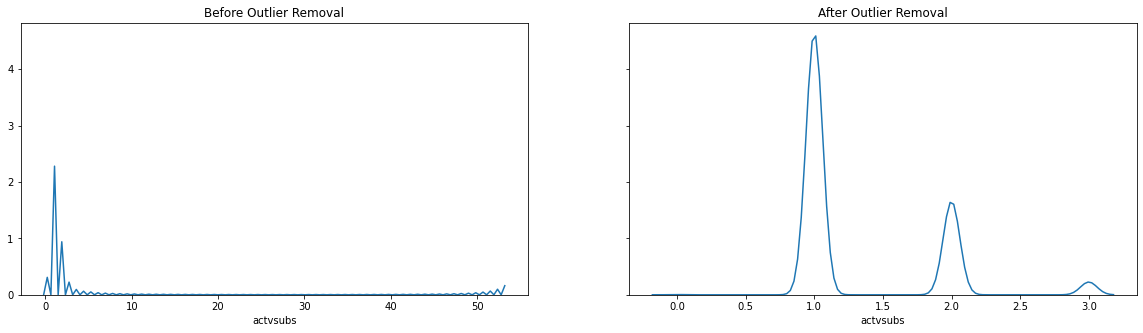

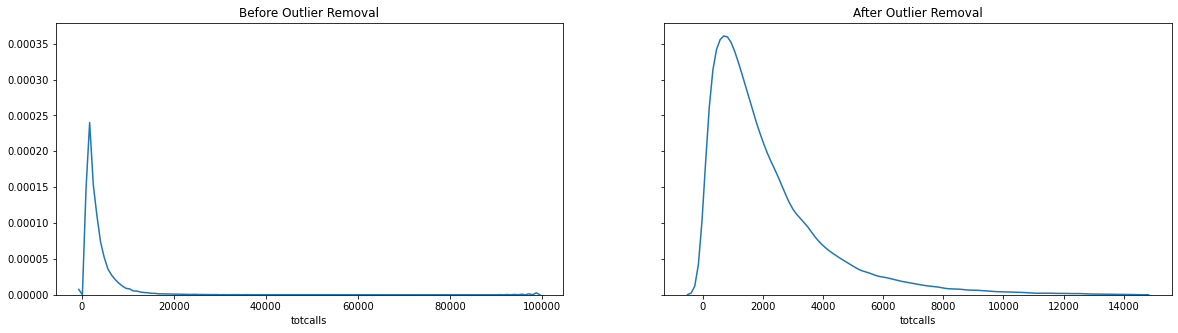

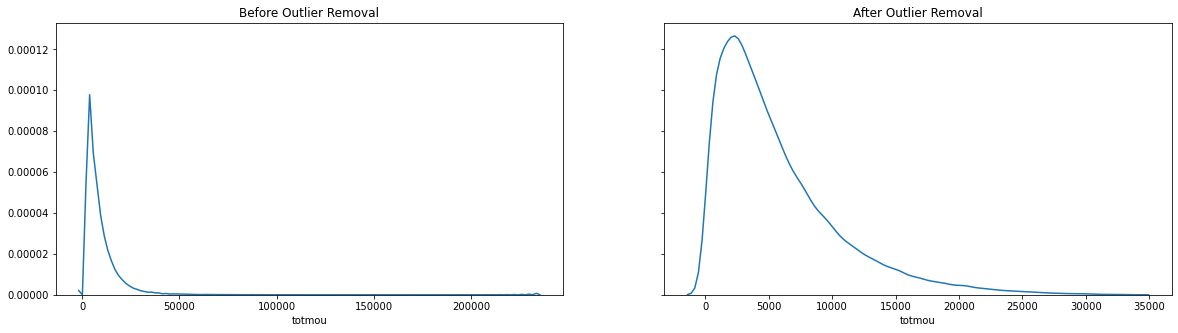

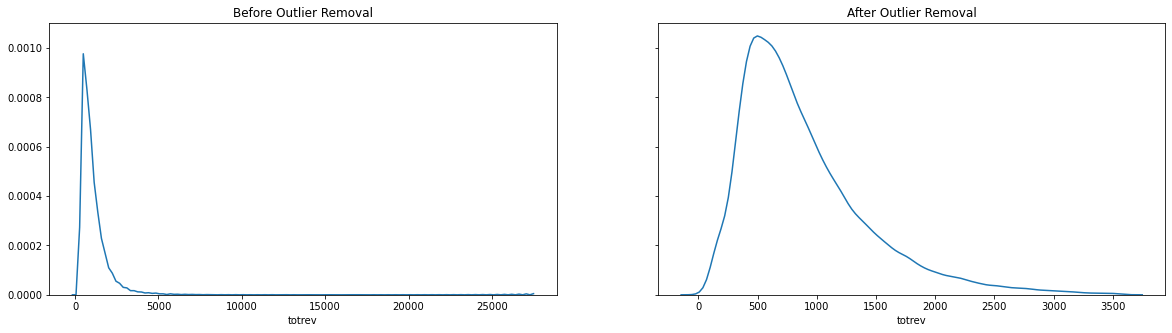

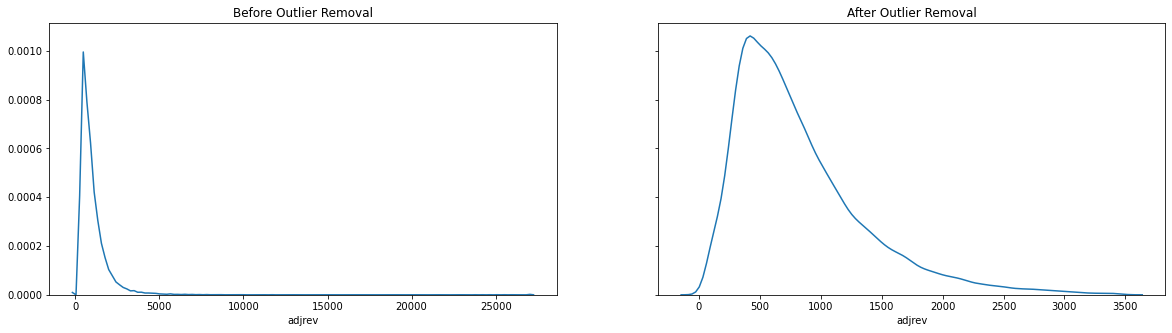

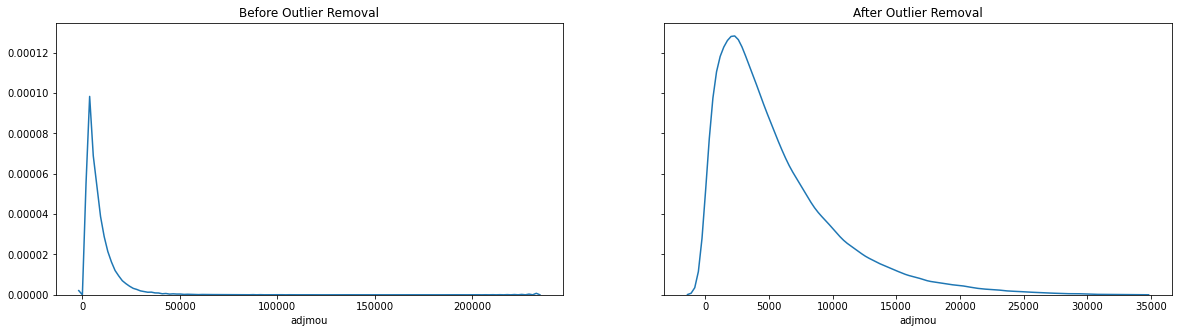

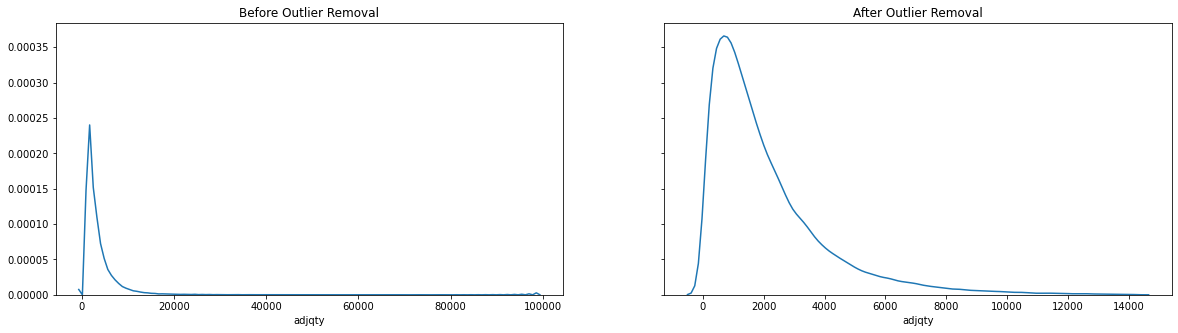

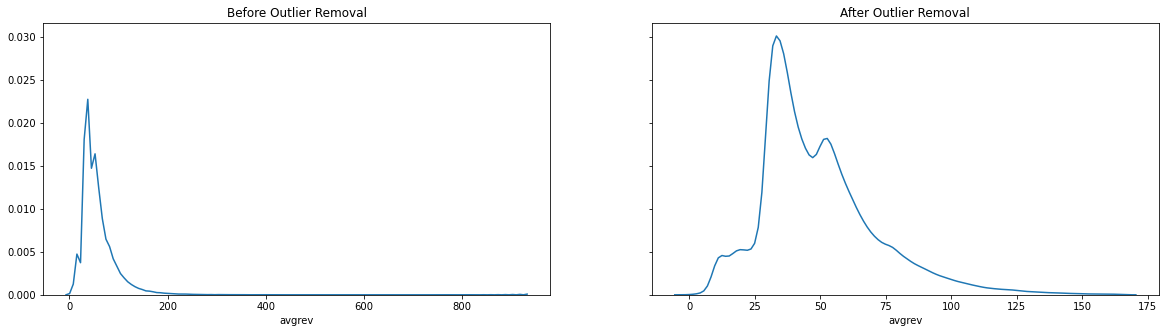

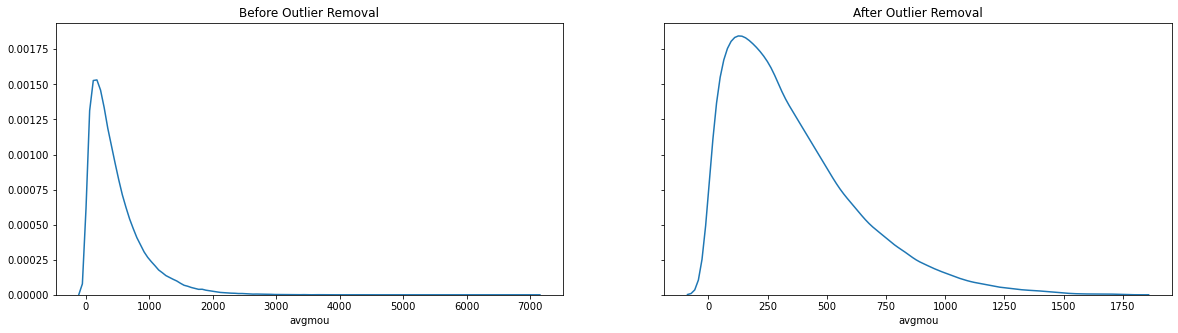

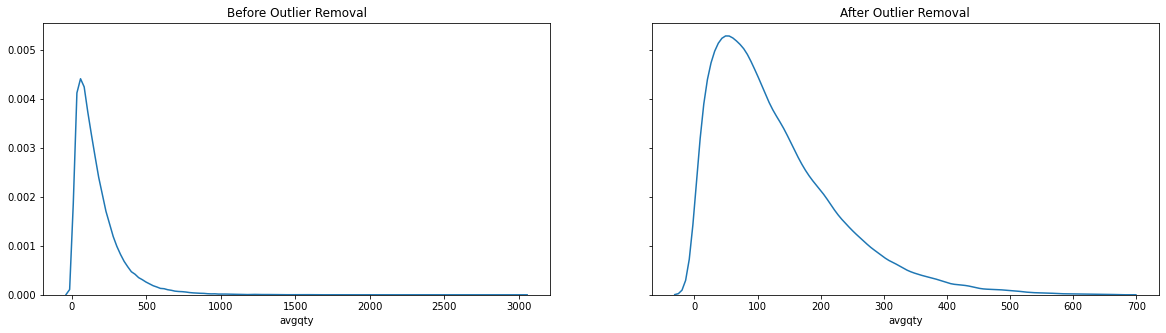

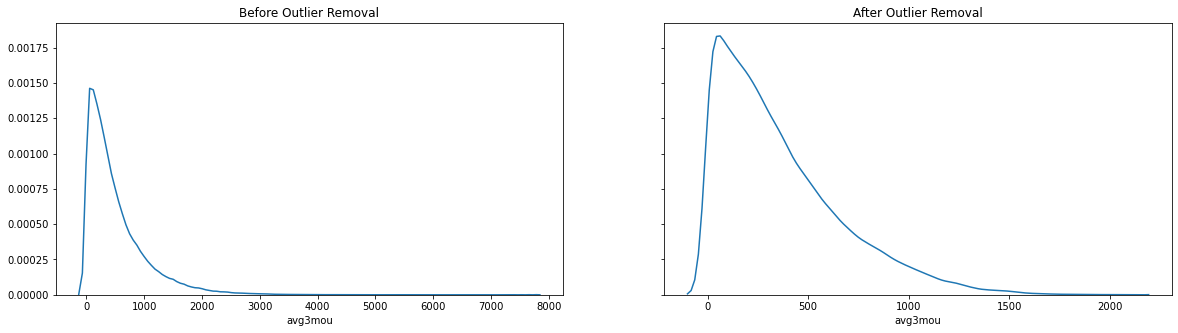

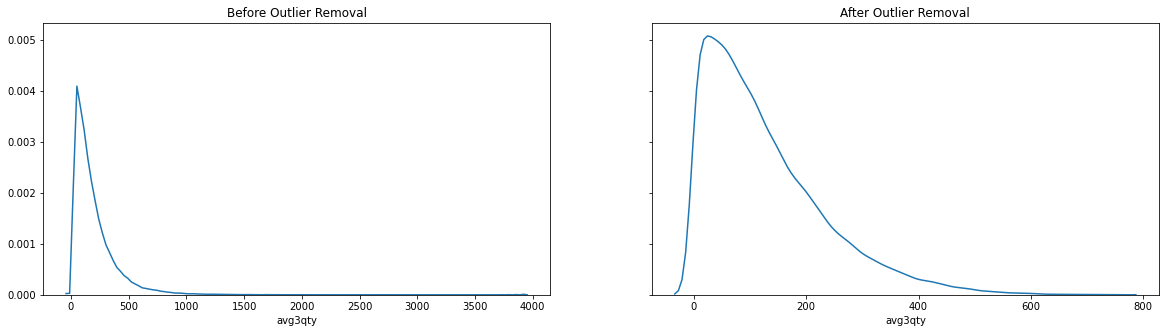

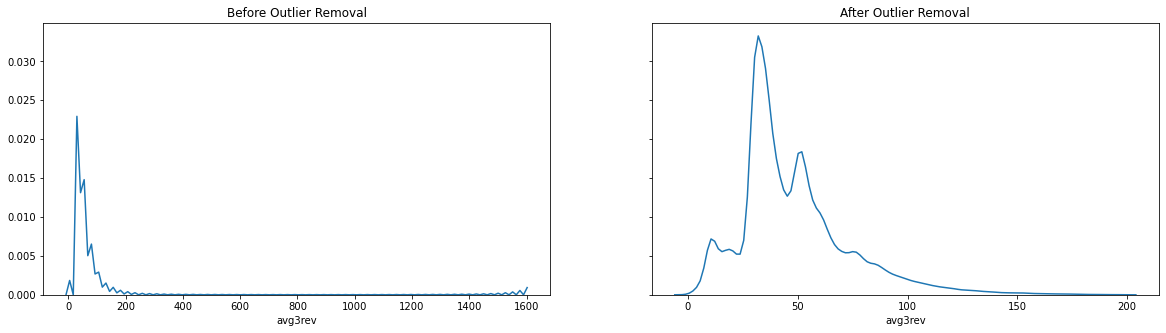

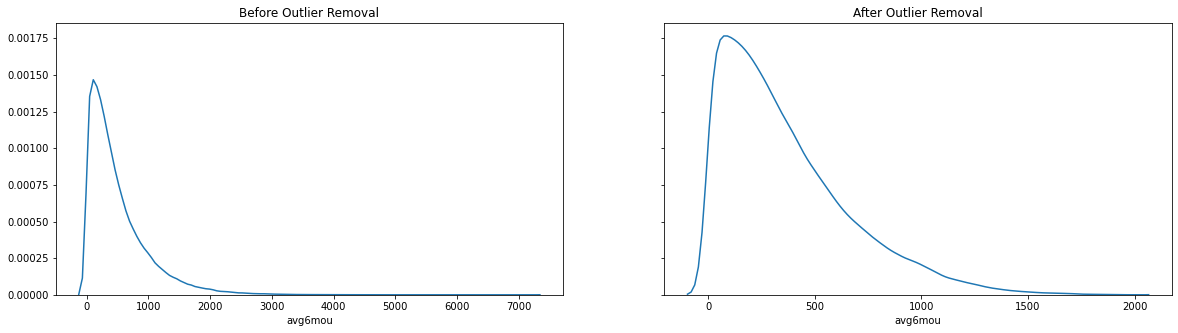

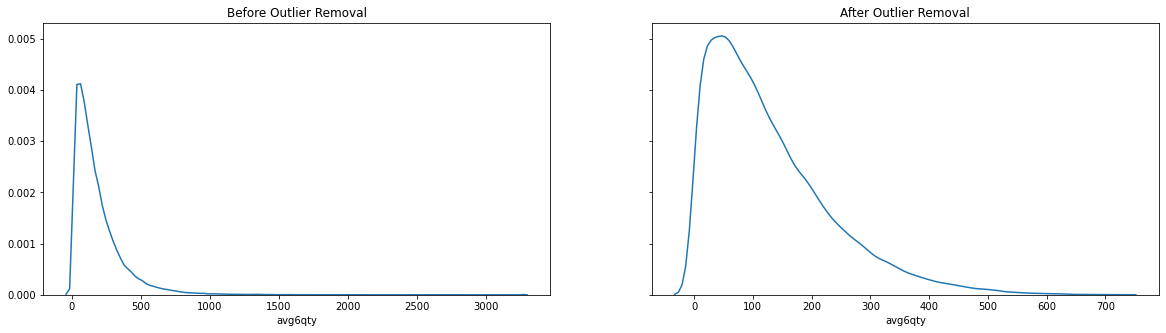

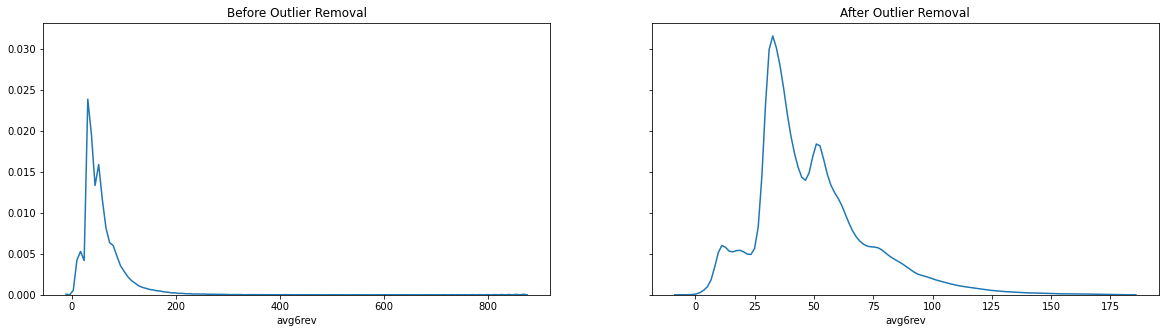

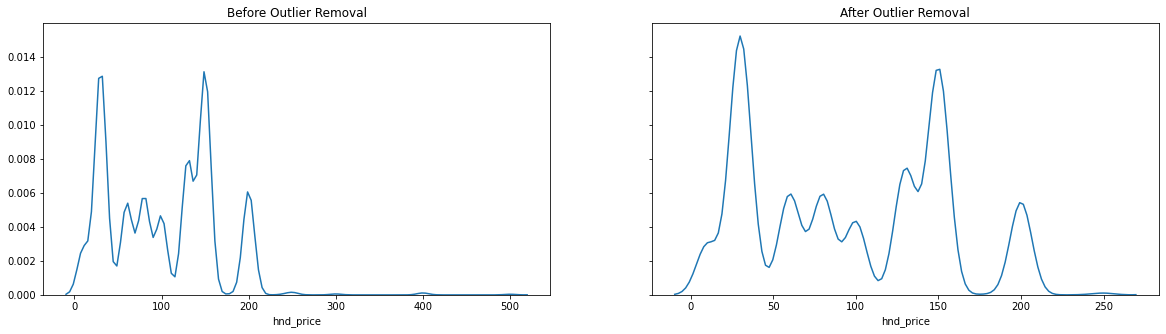

In [161]:
for i, col in enumerate(num_df.columns):
    fig, (ax1, ax2) = plt.subplots(1,2,figsize=(20,5),sharey=True)
    ax1.set_title('Before Outlier Removal') 
    ax2.set_title('After Outlier Removal') 
    sns.distplot(df3[col], hist=False,ax=ax1)
    sns.distplot(num_df[col], hist=False,ax =ax2)

# Convert categorical values to numerical

In [181]:
#Left merge numerical table to categorical 

df5 = pd.merge(num_df, df3,how='left')
df5

rev_Mean    mou_Mean  totmrc_Mean  da_Mean  ovrmou_Mean  ovrrev_Mean  \
0       23.997500  219.250000        22.50   0.2475     0.000000     0.000000   
1       16.990000   10.250000        16.99   0.0000     0.000000     0.000000   
2       38.000000    7.500000        38.00   0.0000     0.000000     0.000000   
3       55.230000  570.500000        71.98   0.0000     0.000000     0.000000   
4       17.145000    0.000000        16.99   0.0000     0.000000     0.000000   
...           ...         ...          ...      ...          ...          ...   
76214   31.923333   63.333333        16.99   0.0000    42.666667    14.933333   
76215   34.990000    6.333333        44.99   0.0000     0.000000     0.000000   
76216   85.150000  815.000000        87.99   0.0000     1.000000     0.390000   
76217   71.993333  724.000000        70.00   0.0000     4.333333     1.083333   
76218  117.490000  384.000000        29.99   0.0000   250.000000    87.500000   

       vceovr_Mean  datovr_Mean  roam_Mean  change_mou  ...  numbcars  \
0         0.000000         0.00       0.00 -157.250000  ...       3.0   
1         0.000000         0.00       0.00   -4.250000  ...       2.0   
2         0.000000         0.00       0.00   -1.500000  ...       1.0   
3         0.000000         0.00       0.00   38.500000  ...       1.0   
4         0.000000         0.00       0.00    0.000000  ...       0.0   
...            ...          ...        ...         ...  ...       ...   
76214    14.933333         0.00       0.00  -38.333333  ...       2.0   
76215     0.000000         0.00       0.00   -6.333333  ...       0.0   
76216     0.000000         0.39       0.39    0.000000  ...       2.0   
76217     1.083333         0.00       0.91  -40.000000  ...       0.0   
76218    87.500000         0.00       0.00    0.000000  ...       0.0   

       forgntvl  ethnic  kid0_2  kid3_5  kid6_10  kid11_15  kid16_17  \
0           0.0       N       U       U        U         U         U   
1           0.0       N       U       Y        U         U         U   
2           0.0       U       Y       U        U         U         U   
3           0.0       I       U       U        U         U         U   
4           0.0       N       U       U        U         U         U   
...         ...     ...     ...     ...      ...       ...       ...   
76214       0.0       H       U       U        U         U         U   
76215       0.0       N       U       U        Y         U         U   
76216       0.0       H       U       U        U         U         U   
76217       0.0       S       U       U        U         U         U   
76218       0.0       S       U       U        U         U         U   

       creditcd  eqpdays  
0             Y    361.0  
1             Y   1504.0  
2             Y   1812.0  
3             Y    434.0  
4             Y    852.0  
...         ...      ...  
76214         Y    883.0  
76215         Y    118.0  
76216         Y    230.0  
76217         Y    882.0  
76218         Y    489.0  

[76219 rows x 89 columns]

In [182]:
cat_df = df5.select_dtypes(exclude=['int16', 'int32', 'int64', 'float16', 'float32', 'float64'])
for col in cat_df.columns:
    print(col)
    print("unique Values :" ,cat_df[col].unique()) # to print categories name only
    print("Value counts of unique values :\n",cat_df[col].value_counts()) # to print count of every category
    print("-----------------------------------------------------------------------------------------")

new_cell
unique Values : ['U' 'Y' 'N']
Value counts of unique values :
 U    51428
Y    14700
N    10091
Name: new_cell, dtype: int64
-----------------------------------------------------------------------------------------
crclscod
unique Values : ['A' 'C' 'B' 'G' 'AA' 'BA' 'Z' 'D' 'U' 'E' 'CA' 'W' 'Y' 'EA' 'J' 'CC' 'GA'
 'D4' 'H' 'DA' 'K' 'B2' 'Z1' 'M' 'U1' 'E4' 'O' 'A2' 'ZA' 'V' 'I' 'TP' 'Z4'
 'C2' 'C5' 'EM' 'D5' 'Z5' 'D2' 'E2' 'V1' 'Z2' 'CY' 'EC' 'ZY' 'A3' 'JF'
 'EF' 'GY' 'IF' 'P1' 'L']
Value counts of unique values :
 AA    30066
A     13644
BA     9459
CA     5929
EA     4246
B      3116
DA     2470
ZA     2381
C      1106
A2      754
E4      365
U       284
E       225
GA      203
G       189
D       165
D4      164
JF      145
Z       141
CY      138
M       131
C2      127
Z4      125
I        83
ZY       78
D5       58
W        51
C5       45
U1       42
V1       41
B2       41
EM       30
Z5       26
GY       24
O        16
EC       16
J        14
E2       14
CC       14
Z1 

In [185]:
df6 = df5.apply(LabelEncoder().fit_transform)
df6

rev_Mean  mou_Mean  totmrc_Mean  da_Mean  ovrmou_Mean  ovrrev_Mean  \
0          3260       998          940        1            0            0   
1          1739        50          553        0            0            0   
2          7747        37         2377        0            0            0   
3         13937      2479         4868        0            0            0   
4          1772         0          553        0            0            0   
...         ...       ...          ...      ...          ...          ...   
76214      5400       303          553        0          222         2626   
76215      6574        32         3069        0            0            0   
76216     22107      3487         5353        0            6           57   
76217     19043      3120         4784        0           26          190   
76218     26080      1706         1563        0         1084         7141   

       vceovr_Mean  datovr_Mean  roam_Mean  change_mou  ...  numbcars  \
0                0            0          0        1903  ...         3   
1                0            0          0        2593  ...         2   
2                0            0          0        2609  ...         1   
3                0            0          0        2814  ...         1   
4                0            0          0        2618  ...         0   
...            ...          ...        ...         ...  ...       ...   
76214         1377            0          0        2422  ...         2   
76215            0            0          0        2581  ...         0   
76216            0           25         54        2618  ...         2   
76217          121            0        197        2413  ...         0   
76218         4336            0          0        2618  ...         0   

       forgntvl  ethnic  kid0_2  kid3_5  kid6_10  kid11_15  kid16_17  \
0             0       9       0       0        0         0         0   
1             0       9       0       1        0         0         0   
2             0      14       1       0        0         0         0   
3             0       6       0       0        0         0         0   
4             0       9       0       0        0         0         0   
...         ...     ...     ...     ...      ...       ...       ...   
76214         0       5       0       0        0         0         0   
76215         0       9       0       0        1         0         0   
76216         0       5       0       0        0         0         0   
76217         0      13       0       0        0         0         0   
76218         0      13       0       0        0         0         0   

       creditcd  eqpdays  
0             1      365  
1             1     1442  
2             1     1517  
3             1      438  
4             1      856  
...         ...      ...  
76214         1      887  
76215         1      122  
76216         1      234  
76217         1      886  
76218         1      493  

[76219 rows x 89 columns]

In [187]:
ProfileReport(df6, minimal=True)